# 1.) Import the data from CCLE into a new Google Colab file

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [34]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/week2/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0

df["region1"] = df["region"]
df["region2"] = df["region"]
df["region3"] = df["region"]
df["region4"] = df["region"]

df.loc[df["region"] == "southwest","region1"] = 1
df.loc[df["region"] == "southeast","region1"] = 0
df.loc[df["region"] == "northwest","region1"] = 0
df.loc[df["region"] == "northeast","region1"] = 0

df.loc[df["region"] == "southwest","region2"] = 0
df.loc[df["region"] == "southeast","region2"] = 1
df.loc[df["region"] == "northwest","region2"] = 0
df.loc[df["region"] == "northeast","region2"] = 0

df.loc[df["region"] == "southwest","region3"] = 0
df.loc[df["region"] == "southeast","region3"] = 0
df.loc[df["region"] == "northwest","region3"] = 1
df.loc[df["region"] == "northeast","region3"] = 0

df.loc[df["region"] == "southwest","region4"] = 0
df.loc[df["region"] == "southeast","region4"] = 0
df.loc[df["region"] == "northwest","region4"] = 0
df.loc[df["region"] == "northeast","region4"] = 1

df.loc[df["smoker"] == "yes","smoker"] = 1
df.loc[df["smoker"] == "no","smoker"] = 0

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region1,region2,region3,region4
0,19,1,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,0,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0,1,0


In [11]:
#Convert sex, smoke and region, investigate scikit.label Encoder

In [7]:
import numpy as np

In [19]:
df_subset = df[["age","sex","bmi","children","smoker","region1","region2","region3"]]

In [39]:
data = np.array(df_subset)
target = np.array(df.iloc[:,6:7])

In [28]:
data

array([[19, 1, 27.9, ..., 1, 0, 0],
       [18, 0, 33.77, ..., 0, 1, 0],
       [28, 0, 33.0, ..., 0, 1, 0],
       ...,
       [18, 1, 36.85, ..., 0, 1, 0],
       [21, 1, 25.8, ..., 1, 0, 0],
       [61, 1, 29.07, ..., 0, 0, 1]], dtype=object)

In [40]:
target

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

# 2.) Split the data into 80/20, in/out sample

In [41]:
cut = int(len(data) * 0.8 // 1) #700

In [42]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

In [43]:
in_data

array([[19, 1, 27.9, ..., 1, 0, 0],
       [18, 0, 33.77, ..., 0, 1, 0],
       [28, 0, 33.0, ..., 0, 1, 0],
       ...,
       [39, 0, 42.655, ..., 0, 0, 0],
       [63, 0, 21.66, ..., 0, 0, 1],
       [54, 1, 31.9, ..., 0, 1, 0]], dtype=object)

# 3.) Normalize the Data

In [44]:
from sklearn import preprocessing

In [45]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [46]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.6155209 , -0.55791981],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
         1.6246402 , -0.55791981],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
         1.6246402 , -0.55791981],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.6155209 , -0.55791981],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
        -0.6155209 ,  1.79237229],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
         1.6246402 , -0.55791981]])

# 4.) Get lambda from Lasso cross validation

In [47]:
from sklearn.linear_model import LassoCV

In [48]:
mod = LassoCV().fit(in_data_scale,in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
a = mod.alpha_

In [50]:
a

115.9799859390741

# 5.) Run a lambda regression with that Lambda

In [57]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 , -158.68185954,   -0.        ])

# 6.) Visualize the coefficients 

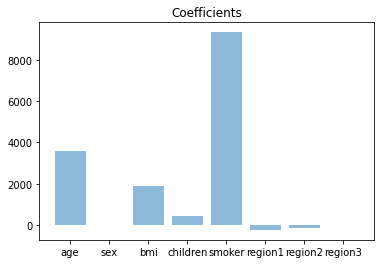

In [58]:
objects = ('age', 'sex', 'bmi', 'children', 'smoker', 'region1', 'region2','region3')
y_num = range(len(objects))
plt.bar(y_num, mod1.coef_, align='center', alpha = 0.5)
plt.xticks(y_num, objects)
plt.title('Coefficients')
plt.show()

# 7.) Interpret the coefficients

From the graph above:  
(1) Age has significantly influence the spending in health insurance, older people tend to spend more on it.   
(2) Sex has nearly no influence on insurance spending.  
(3) Bmi has significantly influence the spending in health insurance,
people with higher BMI indicator tend to spend more on insurance.  
(4) people with children spend more on insurance.   
(5) Smokers are have largest contribution when consider to spend on health insurance.    
(6)people live in northeast (which is the base group) are more likely to spend on health insurance.  

# 8.) Compare in and out of sample MSE’s

In [59]:
in_y_pred = mod1.predict(np.array(in_data_scale))
out_y_pred = mod1.predict(np.array(out_data_scale))

In [60]:
from sklearn.metrics import mean_squared_error
out_sample_mse = mean_squared_error(out_y_pred, out_target)
in_sample_mse = mean_squared_error(in_y_pred, in_target)

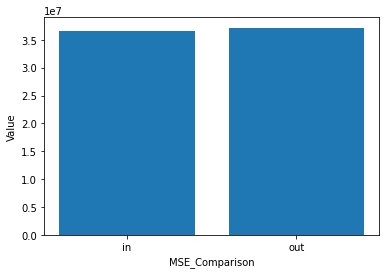

In [61]:
plt.bar(['in', 'out'], [in_sample_mse, out_sample_mse])
plt.xlabel('MSE_Comparison')
plt.ylabel('Value')
plt.show()